# Exercise sheet 11 solution

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

In this exercise, we do a simple regression task using the correlation coefficient as discussed in the last lecture.
At first, let's create the dataset:

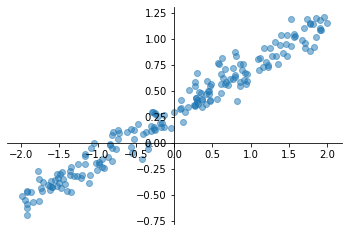

In [14]:
def perturbed_line_data(N):
    np.random.seed(0)
    x = np.random.uniform(low=-2, high=+2, size = N)
    n = np.random.randn(N) * 0.1
    a = np.random.rand(1)
    b = np.random.rand(1)
    y = (b +  a * x) + n
    
    return x, y

N = 200 # The number of samples
x,y = perturbed_line_data(N)

ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 1a (6 points)
Now we would like to predict the corresponding $\hat{y}$ for a given $x$. As discussed in the last lecture, we can make a linear estimator as follows:
$$
\hat{y} = \mu_y +  \rho ( \dfrac{x - \mu_x}{\sigma_x} ) \sigma_y
$$
In this section, we want to implement this linear estimator for the given dataset. So at first, calculate the correlation coefficient $\rho$ and call it rho; use this to calculate $\hat{y}$ and call it y_hat.

Hint: All you need is Numpy!


Correlation coefficient: 0.982


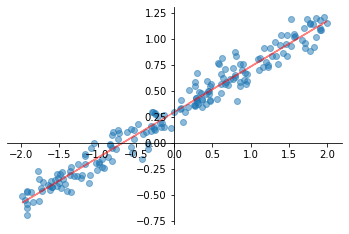

In [15]:
N = 200
x,y = perturbed_line_data(N)


rho = np.corrcoef(x,y)[0,1]
mu_x = np.mean(x , keepdims=True)
mu_y = np.mean(y , keepdims=True)
sigma_x = np.std(x , keepdims=True)
sigma_y = np.std(y, keepdims=True)
y_hat = mu_y + rho * ((x-mu_x)/sigma_x) * sigma_y

print('Correlation coefficient: {:0.3f}'.format(rho))

ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, y_hat, alpha=0.5 , color = 'r')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [16]:
print(len(y_hat))
print(y_hat.mean())
print(y_hat.std())
assert_equal(len(y_hat), N)
assert_almost_equal(y_hat.mean(), 0.294 , places=2)
assert_almost_equal(y_hat.std() , 0.497 , places=2)

200
0.29402801414272345
0.49780366039322904


Why is this estimator called "linear"? Can you explain it from the formula and the plot?

As we have a linear mapping from $x$ to $\hat{y}$, this mapping is a linear model. Moreover, it is also clear from the plot that it is a line in 2d space.

### 1b (2 points)
Since we will use this linear estimator in the next parts, it is more convenient to make it a function that takes the samples $x$ and $y$ as input and returns the predictions $\hat{y}$ and correlation coefficient $\rho$: 

In [17]:
def linear_regressor(x,y):
    rho = np.corrcoef(x,y)[0,1]
    mu_x = np.mean(x , keepdims=True)
    mu_y = np.mean(y , keepdims=True)
    sigma_x = np.std(x , keepdims=True)
    sigma_y = np.std(y, keepdims=True)
    y_hat = mu_y + rho * ((x-mu_x)/sigma_x) * sigma_y
    return y_hat, rho  

y_hat, rho = linear_regressor(x,y)
print('Correlation coefficient: {:0.3f}'.format(rho))

Correlation coefficient: 0.982


In [18]:
print(len(y_hat))
print(y_hat.mean())
print(y_hat.std())
assert_equal(len(y_hat), N)
assert_almost_equal(y_hat.mean(), 0.294 , places=2)
assert_almost_equal(y_hat.std() , 0.497 , places=2)

200
0.29402801414272345
0.49780366039322904


We want to assess the performance of our linear regression over a more complicated dataset. At first, let's create it:

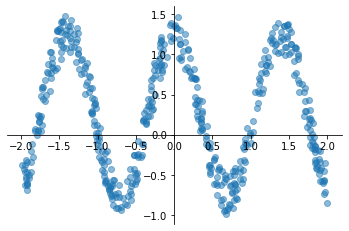

In [19]:
def perturbed_cos_data(N):
    np.random.seed(0)
    x = np.random.uniform(low = -2 , high = 2 , size = N)
    n = np.random.rand(N) * 0.5
    y = np.cos(4.5*x) + n
    
    return x, y

N = 500 # The number of samples
x,y = perturbed_cos_data(N)

ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 1c (2 points)
Now let's calculate $\hat{y}$ and correlation coefficient from the linear regressor function over this dataset:

Correlation coefficient: -0.046


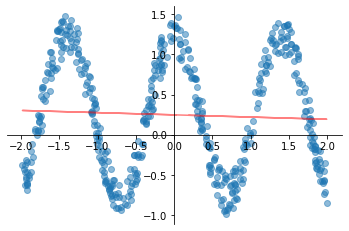

In [20]:
N = 500 # The number of samples
x,y = perturbed_cos_data(N)

y_hat, rho = linear_regressor(x,y)
print('Correlation coefficient: {:0.3f}'.format(rho))

ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, y_hat, alpha=0.5 , color = 'r')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [21]:
print(len(y_hat))
print(y_hat.mean())
print(y_hat.std())
assert_equal(len(y_hat), N)
assert_almost_equal(y_hat.mean(), 0.247 , places=2)
assert_almost_equal(y_hat.std() , 0.032 , places=2)

500
0.2473480091711167
0.032261684065632866


Is this a reasonable estimation? How can we design a better estimator?

Can you compare $\rho$ for these two datasets? Which one is greater, and what does it mean to you?

In this example, we want to model the data with a complicated structure using a linear model, which is not enough. As a result, the quality of the estimation is not satisfying. Instead, we can use higher-order regression models, for example, quadratic or cubic polynomials, or add more non-linear features to increase the model's flexibility.

### 1d (5 points)
SciPy provides a linear regression function that is similar to our function. Please use the following method to calculate the regression line's slope, intercept, and correlation coefficient ($\rho$). 

Correlation coefficient: 0.982


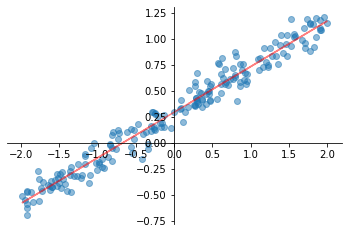

In [22]:
from scipy.stats import linregress
N = 200
x,y = perturbed_line_data(N)

reg = linregress(x, y)
slope = reg.slope
intercept = reg.intercept
rho = reg.rvalue
print('Correlation coefficient: {:0.3f}'.format(rho))

ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, slope * x + intercept, alpha=0.5 , color = 'r')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [23]:
print(slope * intercept * rho)
print(slope/intercept)
assert_almost_equal(slope * intercept * rho, 0.126 , places=2)
assert_almost_equal(slope/intercept , 1.494 , places=2)

0.12624320982763254
1.494714439290595
